# Primer programa de ML para clasificación
## K vecinos mas cercanos (KNN)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  # Libreria para implementar k vecinos mas cercanos
from sklearn.metrics import plot_confusion_matrix   # Para hacer una matriz de confusión (para evaluar que tan bueno es el modelo)

In [10]:
# Paso 1: Lectura de los datos

datos=pd.read_csv("C:/Users/alber/Escritorio/Machine Learning/Modulo 1/datos/estatura_peso.csv")
datos.head()

,gender,height,weight
0,0,63.2,168.7
1,0,68.7,169.8
2,0,64.8,176.6
3,0,67.9,246.8
4,1,68.9,151.6


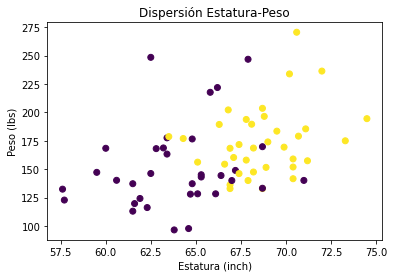

In [15]:
# Paso 2: Pre-procesamiento de los datos
# Análisis exploratorio de datos
# Limpieza de los datos

plt.title("Dispersión Estatura-Peso")
plt.xlabel("Estatura (inch)")
plt.ylabel("Peso (lbs)")
plt.scatter(x=datos["height"],y=datos["weight"],c=datos["gender"])    # Realiza una gráfica de dispersión

In [21]:
# Dimensión de los datos: cuántos datos y covariables tiene el dataframe

N = len(datos)
N

# Identificar los atributos/covariables y la variable objetivo/target

X=datos[["height","weight"]]  # Atributos
Y=datos["gender"]             # Objetivo

# Queremos construir una funciín f --->  f(x)=y

In [43]:
# Entrenamos al algoritmo (memorizar los datos)

Knn=KNeighborsClassifier(n_neighbors=8).fit(X,Y)

In [44]:
# Predicciones

y_pred=Knn.predict(X)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1], dtype=int64)

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


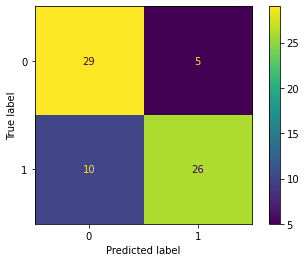

In [45]:
# Hacemos una matriz de confusión para ver que tan bien predijo

plot_confusion_matrix(Knn,X,Y)

In [ ]:
# Podemos tener un algoritmo con un buen desempeño, pero en la practica con datos que el modelo no ha visto o datos nuevos, tenga un mal desempeño

# Necesitamos ver que tan bueno es el algoritmo en datos nuevos o datos que no ha visto.

# ¿ Cómo hacemos para evaluar el modelo?

In [5]:
np.random.choice

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1])